# CS2006 Python Practical 2

# 0. Import the Required Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import json

In [5]:
from wordcloud import WordCloud as wc

In [6]:
from collections import Counter

In [7]:
df=pd.read_csv("CometLanding.csv")

### Check the Initial Length of the CSV File

In [8]:
len(df)

77319

### Check the Data Type of Each Column

In [9]:
df.dtypes

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates               object
user_lang                     object
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
status_url                    object
entities_str                  object
dtype: object

## 1. Refine the Dataset

### 1) Check Data File for Duplicated Tweets and Remove Duplicates

In [10]:
df.drop_duplicates(['id_str'], inplace = True)

In [11]:
len(df)

77268

### 2) Remove Text That is Null

In [12]:
df = df[df['text'].notnull()]

In [13]:
len(df)

77267

## 2. Perform the Descriptive Analysis of the Dataset

### 1.1) Calculate the Total Number of Tweets

In [14]:
numTweets = len(df[(df['in_reply_to_user_id_str'].notnull() == False) #Filters out replies
                   & (df['text'].str.startswith('RT', na=False) == False)]) #Filters out retweets

In [15]:
print("Total number of tweets (excluding replies and retweets): " 
      + str(numTweets)) #Filters out retweets

Total number of tweets (excluding replies and retweets): 15582


### 1.2) Calculate the Total Number of Retweets

In [16]:
dfRT = df[df.text.str.startswith('RT', na=False)]

In [17]:
numRT = len(dfRT)

In [18]:
print("Total number of retweets: " + str(numRT))

Total number of retweets: 59998


### 1.3) Calculate the Total Number of Replies

In [19]:
dfReplies = df[df['in_reply_to_user_id_str'].notnull()]

In [20]:
numReplies = len(dfReplies)

In [21]:
print("Number of replies: " + str(numReplies))

Number of replies: 1723


### 2) Calculate the Total Number of Different Users Tweeting in this DataSet

In [22]:
numUsers = len(df['from_user'].unique())

In [23]:
print("The number of users: " + str(numUsers))

The number of users: 50195


### 3.1) Calculate the Average Number of Tweets by a User

In [24]:
print("Average number of tweets: ", str(numTweets / numUsers))


Average number of tweets:  0.31042932563004283


### 3.2) Calculate the Average Number of Retweets by a User

In [25]:
print("Average number of retweets: ", str(numRT / numUsers))

Average number of retweets:  1.195298336487698


### 3.3) Calculate the Average Number of Replies Sent by a User

In [26]:
print("Average number of replies: ", str(numReplies / numUsers))

Average number of replies:  0.03432612810040841


### 4) Identify the Most Popular Hashtags

In [27]:
hashtags_list = df.text.str.findall(r'#.*?(?=\s|$)') #https://stackoverflow.com/questions/45874879/extract-hashtags-from-columns-of-a-pandas-dataframe
hashtags = hashtags_list.tolist()
hashtags = [item for sublist in hashtags for item in sublist] # https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
count = Counter(hashtags)
count.most_common()
#TODO - print nicely

[('#CometLanding', 53441),
 ('#cometlanding', 10486),
 ('#67P', 5872),
 ('#Rosetta', 4978),
 ('#Philae', 2613),
 ('#CometLanding:', 1745),
 ('#Cometlanding', 1004),
 ('#CometLanding.', 981),
 ('#WishKoSaPasko', 970),
 ('#HappyBirthdaySandaraPark', 965),
 ('#67P/CG', 701),
 ('#esa', 676),
 ('#rosetta', 675),
 ('#SEP', 623),
 ('#philae', 588),
 ('#PoseToiPhilae', 535),
 ('#Comâ€¦', 514),
 ('#CometLanding,', 462),
 ('#space', 443),
 ('#comâ€¦', 422),
 ('#cometlanding,', 413),
 ('#CometLâ€¦', 408),
 ('#67P.', 406),
 ('#rosettamission', 404),
 ('#ESA', 396),
 ('#comet', 346),
 ('#CometLanâ€¦', 342),
 ('#cometlanding.', 323),
 ('#cometlaâ€¦', 323),
 ('#CometLanding!', 257),
 ('#Philae2014', 254),
 ('#Câ€¦', 251),
 ('#â€¦', 239),
 ('#ISS', 231),
 ('#COMETLANDING', 230),
 ('#AOS', 223),
 ('#RejectedMuppets', 218),
 ('#HomeToMama', 206),
 ('#Cometâ€¦', 205),
 ('#67P,', 194),
 ('#CometLanding?', 190),
 ('#CometLandingâ€\x9d', 190),
 ('#Comeâ€¦', 189),
 ('#science', 182),
 ('#CometLanding"', 153)

## 3. Build plots/visualisations

### 3.1) The structure of the dataset

In [28]:
structure_names = ["Tweets", "Retweets", "Replies"]

In [29]:
structure_data = [numTweets, numRT, numReplies]

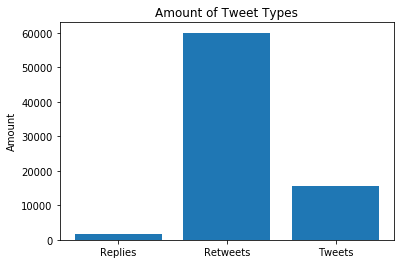

In [30]:
plt.bar(structure_names, structure_data, align="center")
plt.ylabel('Amount')
plt.title('Amount of Tweet Types')
plt.show()

### 3.2) The timeline of the tweets activity

In [31]:
df.time = [str(x) for x in df["time"]]
df.time = [x.split(" ")[0] for x in df["time"]]
df.time = pd.to_datetime(df.time, dayfirst=True)

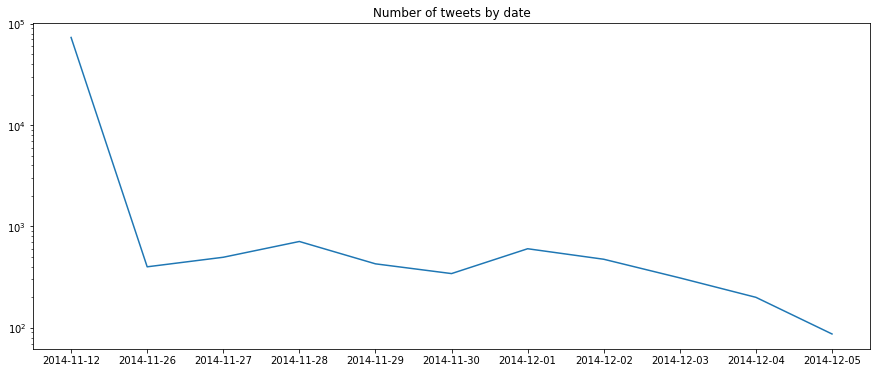

In [32]:
plt.rcParams["figure.figsize"] = [15, 6]
#values = df["time"].value_counts()
#values.index = pd.to_datetime(values.index)
#values = values.sort_index()
values = pd.DataFrame(df["time"].value_counts().reset_index())
values.columns = ["date", "amount"]
values = values.sort_values(by="date")
plt.plot([str(x).split(" ")[0] for x in values.date], values.amount)
plt.yscale("log")
plt.title("Number of tweets by date")

#for i in values:
    #plt.annotate(values.amount[i], (values.date[i], values.amount[i])
    
plt.show()

### 3.3) Word cloud for hashtags

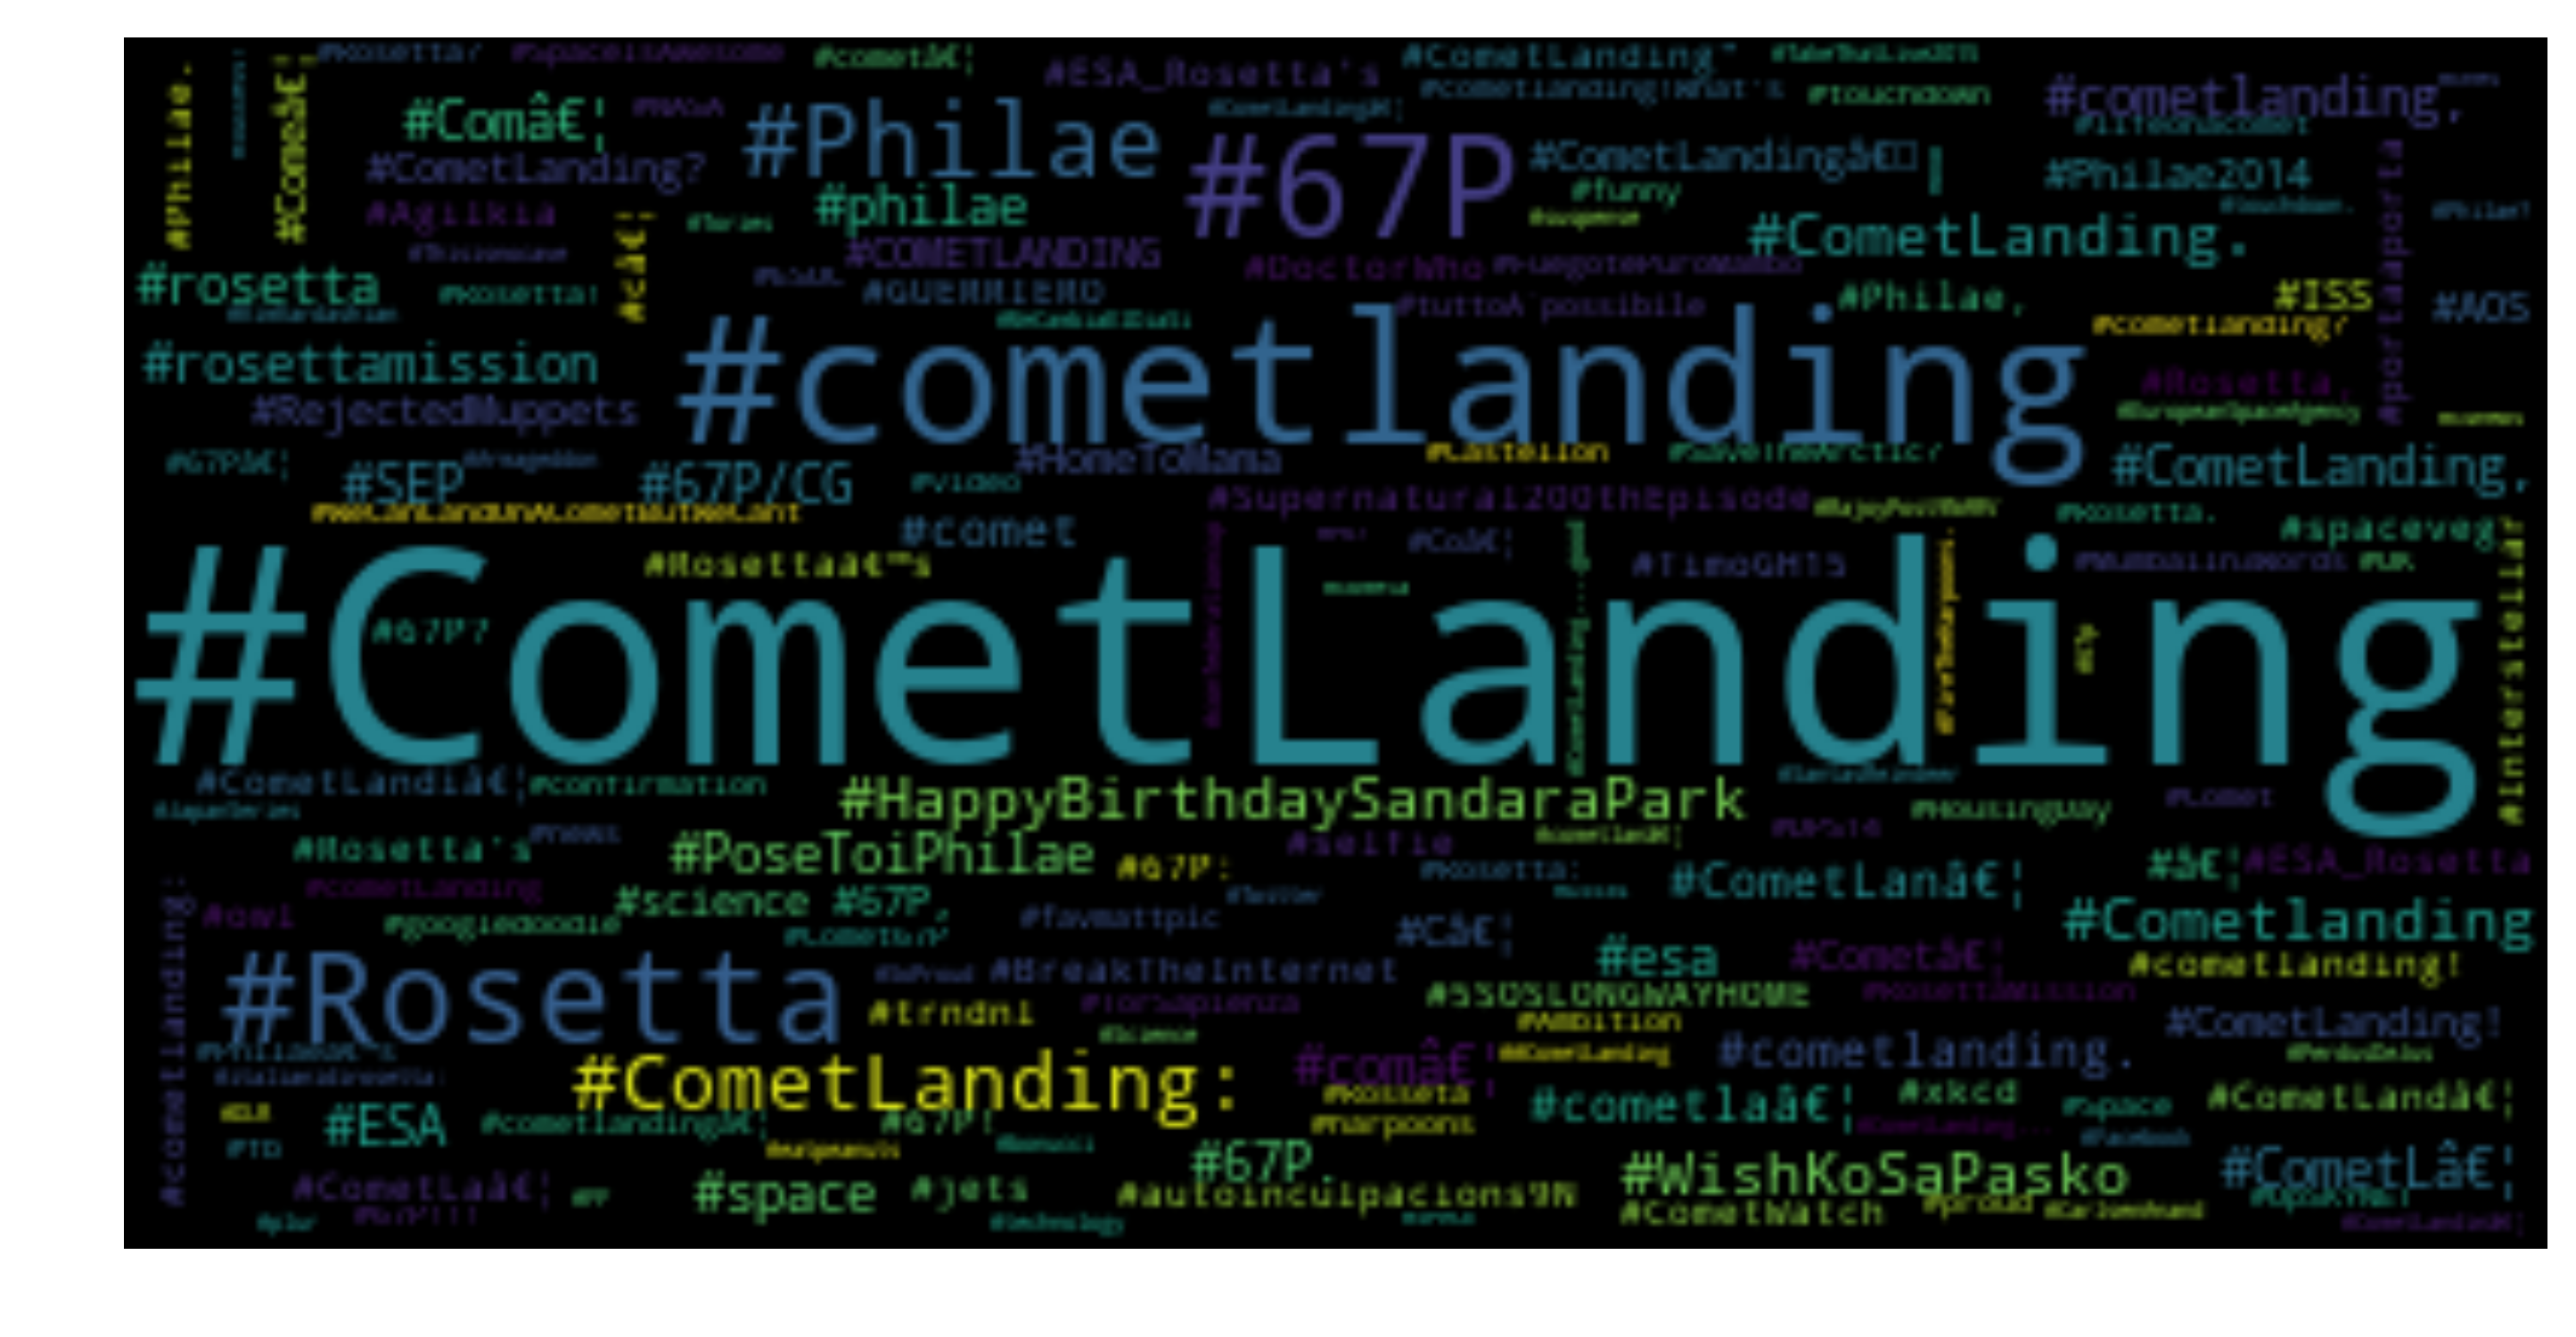

In [36]:
hashtagDictionary = dict(count)

wordcloud = wc(max_font_size=80).generate_from_frequencies(hashtagDictionary)
plt.figure(dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()